In [2]:
import xml.etree.ElementTree as ET
import numpy as np
import os

In [12]:

tree = ET.iterparse('data/malta-latest.xml')



In [13]:
# Forkert version

with open('preprocessing_v1.txt', 'w') as f:
    
    tree = ET.iterparse('data/malta-latest.xml', events = ('start', 'end'))
    for event, child in tree:

        if event == 'start':
            if child.tag == 'way':
                child_attributes = child.attrib
                child_id = child_attributes['id']
                
                #tags = [grandchild.attrib for grandchild in child if grandchild.tag == 'tag']
                hw = [grandchild.attrib['k'] == 'highway' for grandchild in child if grandchild.tag == 'tag']
                nds = [grandchild.attrib['ref'] for grandchild in child if grandchild.tag == 'nd']
                #print(hw,'\n')
                
                if any(hw) == True:
                    f.write(f'{child_id}:{nds}\n')
        if event == 'end':
            child.clear()


            
        

In [14]:
# nr. 1

# get the node IDs of the nodes referenced in highways

with open('nodesInWays.txt', 'w') as f:
    
    tree = ET.iterparse('data/malta-latest.xml', events = ('start', 'end'))
    for event, child in tree:

        if event == 'start':
            if child.tag == 'way':

                hw = [grandchild.attrib['k'] == 'highway' for grandchild in child if grandchild.tag == 'tag']
                nds = [grandchild.attrib['ref'] for grandchild in child if grandchild.tag == 'nd']

                
                if any(hw):
                    for nd in nds:
                        f.write(f'{nd}\n')
                        
        if event == 'end':
            child.clear()
    
    

In [15]:
# Windows/Linux
if os.name == 'nt':
    os.system('cmd /c SORT nodesInWays.txt /unique /o nodesInWaysSorted.txt')

# Mac
elif os.name == 'posix':
    os.system('SORT nodesInWays.txt --unique -o nodesInWaysSorted.txt')

In [16]:
# Med binary search - tager ca 5 sec for malta
f = open('nodesInWaysSorted.txt', 'r')
list = f.read().splitlines()
f.close()

from bisect import bisect_left
 
def BinarySearchTF(a, x):
    i = bisect_left(a, x)
    if i != len(a) and a[i] == x:
        return True
    else:
        return False

# find de nodes vi gerne vil have samt deres (lat, lon)

with open('nodes.txt', 'w') as f:
    
    tree = ET.iterparse('data/malta-latest.xml', events = ('start', 'end'))
    for event, child in tree:

        if event == 'start':
            
            if child.tag == 'node':

                if BinarySearchTF(list,child.attrib['id']):    

                    nodeID = child.attrib['id']
                    lat = child.attrib['lat']
                    lon = child.attrib['lon']

                    f.write(f'{nodeID}, {lat}, {lon}\n')
                        
        if event == 'end':
            child.clear()

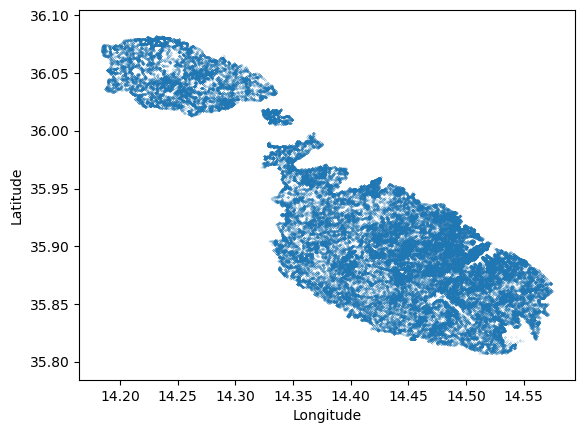

In [17]:
import numpy as np
import matplotlib.pyplot as plt
coords = []
with open('nodes.txt', 'r') as nodes:

    for line in nodes:
        list = [float(i) for i in line.split(sep=",")]
        coords.append(list[1:])


X = np.array(coords)
plt.plot(X[:, 1], X[:, 0], 'o', markersize=0.1)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.axis('equal')
plt.show()

In [18]:
with open('nodes.txt', 'r') as n:
    nodes = []
    lats = []
    longs = []

    for line in n.readlines():
        node, lat, lon = line.strip('\n').split(',')
        nodes.append(int(node))
        lats.append(float(lat))
        longs.append(float(lon))

print(len(nodes))


153298


In [19]:
def BinarySearchIndex(a, x):
    i = bisect_left(a, x)
    if i != len(a) and a[i] == x:
        return i
    

In [20]:

with open('edges.txt', 'w') as f:
    
        tree = ET.iterparse('data/malta-latest.xml', events = ('start', 'end'))
        for event, child in tree:

            if event == 'start':
                if child.tag == 'way':
                    child_attributes = child.attrib
                    
                    #tags = [grandchild.attrib for grandchild in child if grandchild.tag == 'tag']
                    hw = any([grandchild.attrib['k'] == 'highway' for grandchild in child if grandchild.tag == 'tag'])
                    nds = [grandchild.attrib['ref'] for grandchild in child if grandchild.tag == 'nd']
                    oneway = any([grandchild.attrib['k'] == 'oneway' and grandchild.attrib['v'] == 'yes' for grandchild in child if grandchild.tag == 'tag'])

                    if hw:
                        for i in range(len(nds) - 1):

                            nodeOne = nds[i].strip()
                            nodeTwo = nds[i + 1].strip()
                            try:
                                lineNodeOne = BinarySearchIndex(nodes, int(nodeOne))
                                lineNodeTwo = BinarySearchIndex(nodes, int(nodeTwo))

                                latNodeOne = lats[lineNodeOne]
                                lonNodeOne = longs[lineNodeOne]
                                latNodeTwo = lats[lineNodeTwo]
                                lonNodeTwo = longs[lineNodeTwo]

                            except Exception as e:
                                print(nodeOne, nodeTwo, lineNodeOne, lineNodeTwo, type(nodeOne), type(nodeTwo))
                                break

                            ## Distance Formula
                            dist = 1


                            f.write(f'{nodeOne},{nodeTwo},{dist}\n') # (from, to)

                        if not oneway:
                            for i in range(len(nds) - 1):

                                dist = 2
                                f.write(f'{nodeTwo},{nodeOne},{dist}\n') # (from, to)
                            
            if event == 'end':
                child.clear()

In [21]:
# Windows/Linux
if os.name == 'nt':
    os.system('cmd /c SORT edges.txt /o edgesSorted.txt')

# Mac
elif os.name == 'posix':
    os.system('SORT nodesInWays.txt -o edgesSorted.txt')

In [22]:
d = {}
with open('edges.txt') as edges:
    
    for line in edges.readlines():
        fra, til, dist = [int(i) for i in line.strip().split(sep=",")]
        vals = d.get(fra)
        if vals == None:
            d[fra] = til
        elif isinstance(vals, int):
            d[fra] = vals, til
        else:
            d[fra] = *vals, til

print(d)

{244533748: (2515945509, 265929638), 2515945509: (265929626, 2515945508, 2515945508), 265929626: (2515945509, 2515945509, 4424581149, 9061110260, 246189645), 246189488: (9464499174, 9806110712), 9464499174: (246189488, 244537848), 30910683: (1528652289, 10048783453), 1528652289: (30910684, 3764977341), 265929628: (265929627, 3555400687), 265929627: (30256509, 244534706), 30256509: (30910686, 244534398), 30910686: (1276539121, 30910800), 1276539121: (244537353, 1276538980, 1276538980), 244537353: (2515945507, 244537312), 2515945507: (244532959, 2515945506, 2515945506, 2515945506, 2515945508), 244534069: (246189697, 9061110261, 9061110261, 9061110261, 9061110261, 9061110261, 9061110261, 9061110261, 30910684, 8438496401), 31017512: (31017513, 3334343474, 3334343474, 9060945649, 9060945649, 9060945649, 9060945649, 9060945649), 1190101737: (2515945501, 31017670), 2515945501: (31017672, 2515945502), 31017672: (31017673, 246188948, 244532594), 31017673: (31017674, 2515945505), 31017674: (3101

In [23]:
d

{244533748: (2515945509, 265929638),
 2515945509: (265929626, 2515945508, 2515945508),
 265929626: (2515945509, 2515945509, 4424581149, 9061110260, 246189645),
 246189488: (9464499174, 9806110712),
 9464499174: (246189488, 244537848),
 30910683: (1528652289, 10048783453),
 1528652289: (30910684, 3764977341),
 265929628: (265929627, 3555400687),
 265929627: (30256509, 244534706),
 30256509: (30910686, 244534398),
 30910686: (1276539121, 30910800),
 1276539121: (244537353, 1276538980, 1276538980),
 244537353: (2515945507, 244537312),
 2515945507: (244532959, 2515945506, 2515945506, 2515945506, 2515945508),
 244534069: (246189697,
  9061110261,
  9061110261,
  9061110261,
  9061110261,
  9061110261,
  9061110261,
  9061110261,
  30910684,
  8438496401),
 31017512: (31017513,
  3334343474,
  3334343474,
  9060945649,
  9060945649,
  9060945649,
  9060945649,
  9060945649),
 1190101737: (2515945501, 31017670),
 2515945501: (31017672, 2515945502),
 31017672: (31017673, 246188948, 244532594),